# Sales data sample

##Import Library

In [29]:
# manage data
import pandas as pd
import numpy as np

# plot
import seaborn as sns
import matplotlib.pyplot as plt

#data preparetion
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

##Import Data

In [2]:
#เGoogle Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Work/Python/DATA/sales_data_sample.csv")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Understanding


##Explore Data

In [6]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
data.shape

(2823, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
# ตรวจสอบค่า Null
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

จากการตรวจสอบค่า Null 
- ADDRESSLINE2 มีข้อมูลสูญหาย 89.3% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column
- STATE มีข้อมูลสูญหาย 52.64% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column
- POSTALCODE มีข้อมูลสูญหาย 2.69% จากข้อมูลทั้งหมด เนื่องจากข้อมูลสูญหายไม่ถึง 5% ควรตัดออกเฉพาะ Row ที่ไม่มีข้อมูล
- TERRITORY มีข้อมูลสูญหาย 38.04% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column


###Check Value of Numerical variable

In [11]:
numerical_atts = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']

In [12]:
data[numerical_atts].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

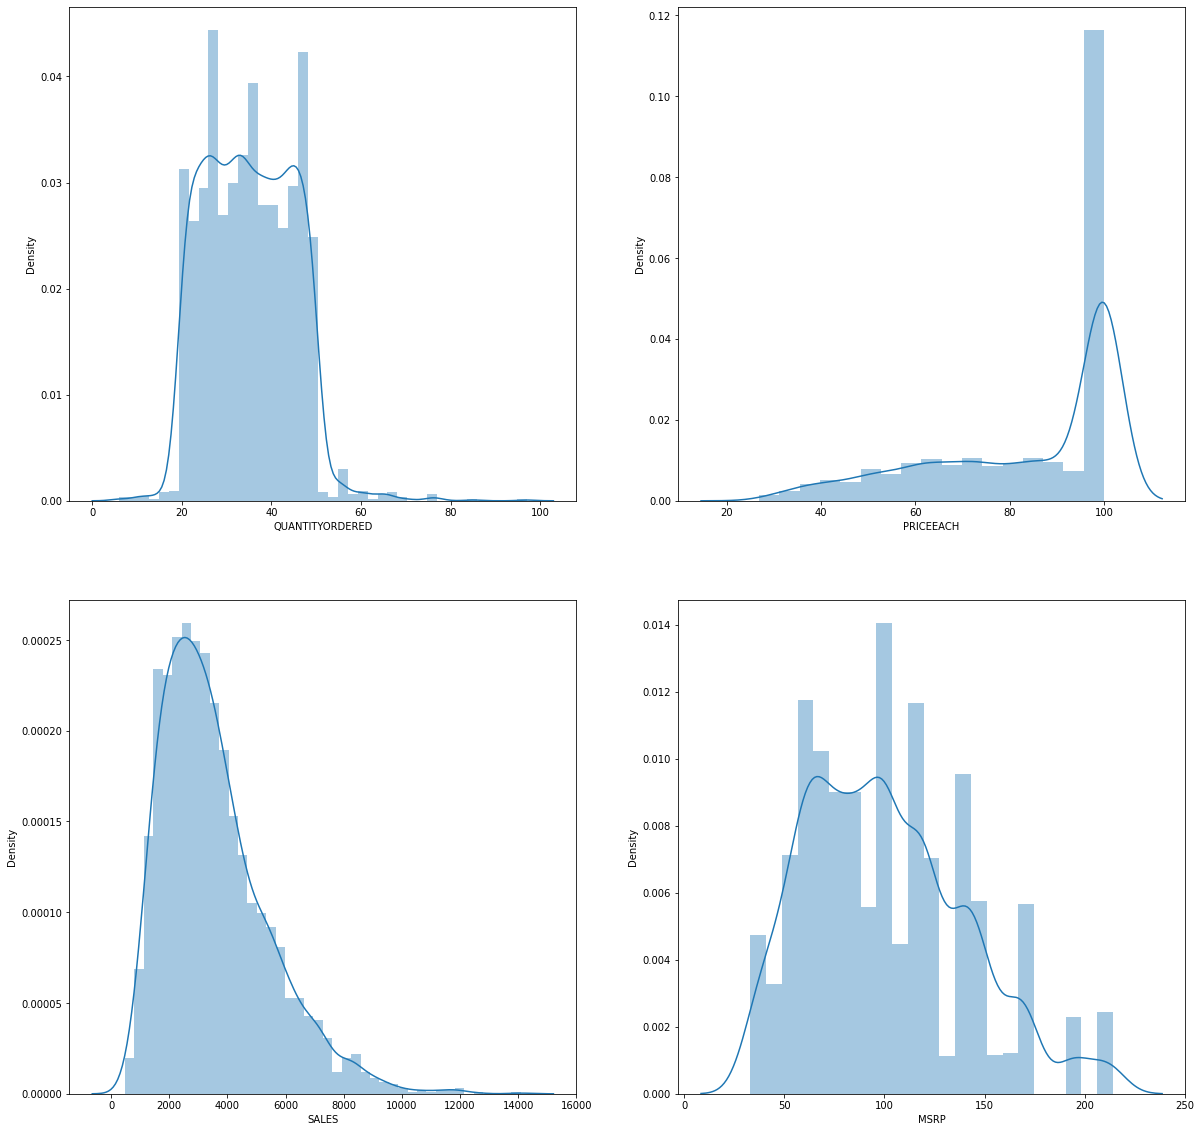

In [13]:
# plot distribution of numerical attributes
num_df = data[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.distplot(num_df[num_df.columns[i-1]])

### Check Value of Categorical Data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
categorical_atts = data.drop(columns=numerical_atts).columns.to_list()

In [ ]:
# number of unique values in categorical atts
data[categorical_atts].nunique()

ORDERNUMBER         307
ORDERLINENUMBER      18
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
PRODUCTCODE         109
CUSTOMERNAME         92
PHONE                91
ADDRESSLINE1         92
ADDRESSLINE2          9
CITY                 73
STATE                16
POSTALCODE           73
COUNTRY              19
TERRITORY             3
CONTACTLASTNAME      77
CONTACTFIRSTNAME     72
DEALSIZE              3
dtype: int64

###Missing data

In [15]:
# ตรวจสอบค่า Null
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

###Outlier

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

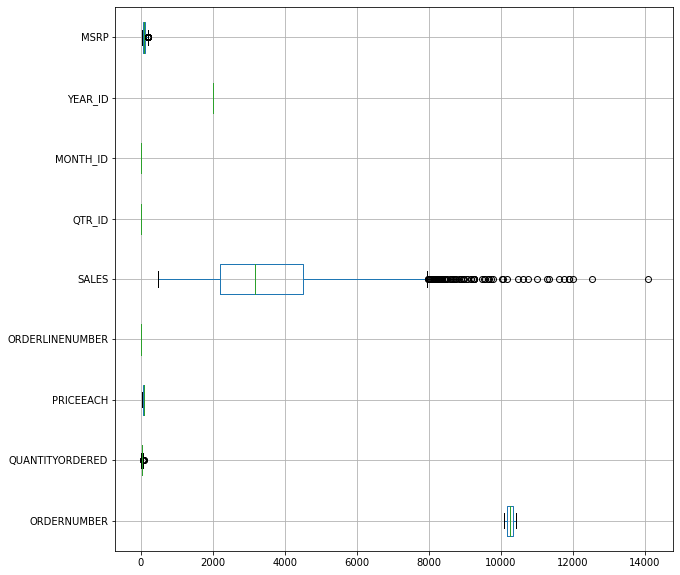

In [16]:
data.boxplot(vert=False, figsize=(10,10))

###Correlation

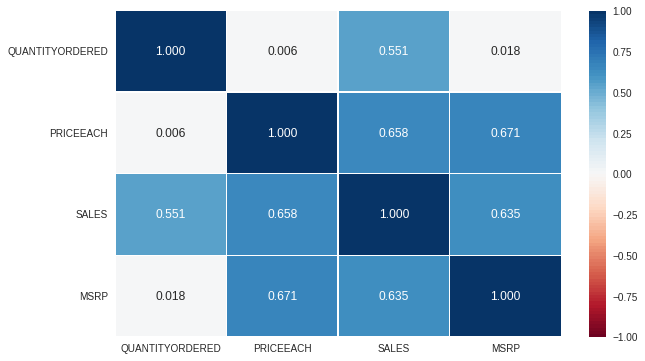

In [ ]:
# correlation matrix
num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

#Data Preparation
การเตรียมข้อมูล

##Drop 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [18]:
data = data.drop(["PHONE","ADDRESSLINE1","ADDRESSLINE2","STATE","POSTALCODE","TERRITORY","CONTACTLASTNAME","CONTACTFIRSTNAME","ORDERDATE"],axis=1)

In [19]:
#ลบ "ข้อมูล" ที่เป็น null value ออก
data.dropna()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Small
2819,10373,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium
2820,10386,43,100.00,4,5417.57,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Medium
2821,10397,34,62.24,1,2116.16,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,Small


## Clean Outliers

In [20]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(data[num_att], [75,25])
    MEAN = data[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=data.drop(data.loc[data[num_att]< minimum,num_att].index) 
    data_clean=data.drop(data.loc[data[num_att]> maximum,num_att].index)

In [21]:
len(data_clean)

2795

##Normalization

In [22]:
numerical_atts

['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

In [23]:
# transform data
numeric_transformer = MinMaxScaler()
#categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# exclude target attribute
numerical_atts = [x for x in numerical_atts]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts)
        #('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean[numerical_atts])
data_trans = pd.DataFrame(data_pp, 
             columns = [numerical_atts])
data_trans

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
0,0.263736,0.941193,0.175644,0.356322
1,0.307692,0.744940,0.167916,0.356322
2,0.384615,0.928063,0.250150,0.356322
3,0.428571,0.771061,0.240030,0.356322
4,0.472527,1.000000,0.347273,0.356322
...,...,...,...,...
2790,0.153846,1.000000,0.129572,0.120690
2791,0.252747,1.000000,0.257074,0.120690
2792,0.406593,1.000000,0.362882,0.120690
2793,0.307692,0.483589,0.120143,0.120690


In [24]:
#นำข้อมูลออก
data_trans.to_excel('numerical_atts(Normalization).xlsx')

In [25]:
pd.DataFrame(data_trans).describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2795.000000,2795.000000,2795.000000,2795.000000
mean,0.319786,0.774273,0.223445,0.382648
std,0.107182,0.276372,0.132776,0.222686
min,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.570090,0.125715,0.201149
50%,0.318681,0.930525,0.197624,0.367816
75%,0.406593,1.000000,0.292183,0.511494
max,1.000000,1.000000,1.000000,1.000000


#Model

In [30]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_trans)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=3)

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

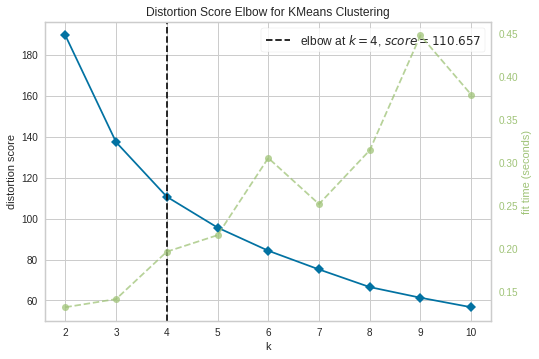

In [33]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_trans)
Elbow_M.show()